### This notebook can be used to import Boston demographic data from the Analyze Boston website and display the data using different graphs.  There are separate functions for importing the data and formatting it into a dataframe, displaying a horizontal bar graph, displaying a stacked horizontal bar graph, and displaying a choropleth graph.  The keys for the graph functions are provided at the bottom.  Pass the respective key to the respective function to display the result, or use the for loops provided by uncommenting to display all of the graphs.  A visual example for each graph is provided at the bottom.

#### The horizontal bar graph style is sourced from https://scentellegher.github.io/visualization/2018/10/10/beautiful-bar-plots-matplotlib.html.  The urls for the datasets can be found below.  The demographic data originally comes from the 2013-2017 ACS.  

##### The graph functions are slow because they call the data import and format function each time.  There is a copy/slice error while displaying the Unemployment Rate graphs.  I think it is due to the subtraction performed on the slice but couldn't get passed it by using .copy() or pd.DataFrame.  The choropleth bins are determined using quantiles, which can lead to large/weird bin lengths.  It could be better to specify the bins depending on the question the user wants answered.  The choropleth for loop might not work for displaying the maps.  

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib
import matplotlib.style
import matplotlib.pyplot as plt
import folium
import requests
from folium.features import DivIcon
import seaborn as sns

In [2]:
url = 'https://data.boston.gov/dataset/8202abf2-8434-4934-959b-94643c7dac18/resource/e684798f-e175-4ab1-8f70-ed80e4e260cc/download/boston_neighborhood_demographics_2013-2017.xlsx'
url_geo = 'http://bostonopendata-boston.opendata.arcgis.com/datasets/3525b0ee6e6b427f9aab5d0a1d0a1a28_0.geojson?outSR={%22latestWkid%22:2249,%22wkid%22:102686}'

In [3]:
def read_demographic_data(user_input):
    
    global df_age, df_housing_tenure, df_Hh_type, df_race_ethnicity, df_geo_mobil, df_nativity,df_birth_region,\
    df_group_quart_pop, df_school_enroll, df_ed_attain, df_commte_means, df_commute_time, df_work_place, df_Hh_vehicles,\
    df_occupation, df_industries, df_labor, df_pc_income, df_Hh_income, df_fam_income, df_poverty, df_poverty_age, df_poverty_fam
    
    if user_input == 'Age':
        df_age = pd.read_excel(url, sheet_name = 1, header = 2, index_col = 0)
        df_age.drop(df_age.index[26:29], inplace = True)
        return df_age
    elif user_input == 'Housing Tenure':
        df_housing_tenure = pd.read_excel(url, sheet_name = 2, header = 2, index_col = 0)
        df_housing_tenure.drop(df_housing_tenure.index[26:29], inplace = True)
        return df_housing_tenure
    elif user_input == 'Household Type':
        df_Hh_type = pd.read_excel(url, sheet_name = 3, header = 4, index_col = 0)
        df_Hh_type.drop(df_Hh_type.index[26:29], inplace = True)
        return df_Hh_type
    elif user_input == 'Race':
        df_race_ethnicity = pd.read_excel(url, sheet_name = 4, header = 3, index_col = 0)
        df_race_ethnicity.drop(df_race_ethnicity.index[26:29], inplace = True)
        return df_race_ethnicity
    elif user_input == 'Geographic Mobility':
        df_geo_mobil = pd.read_excel(url, sheet_name = 5, header = 2, index_col = 0)
        df_geo_mobil.drop(df_geo_mobil.index[26:29], inplace = True)
        return df_geo_mobil
    elif user_input == 'Nativity':
        df_nativity = pd.read_excel(url, sheet_name = 6, header = 2, index_col = 0)
        df_nativity.drop(df_nativity.index[26:29], inplace = True)
        return df_nativity
    elif user_input == 'Birth Region':
        df_birth_region = pd.read_excel(url, sheet_name = 7, header = 2, index_col = 0)
        df_birth_region.drop(df_birth_region.index[26:29], inplace = True)
        return df_birth_region
    elif user_input == 'Group Quarter Population':
        df_group_quart_pop = pd.read_excel(url, sheet_name = 8, header = 2, index_col = 0)
        df_group_quart_pop.drop(df_group_quart_pop.index[26:29], inplace = True)
        return df_group_quart_pop
    elif user_input == 'School Enrollment':
        df_school_enroll = pd.read_excel(url, sheet_name = 9, header = 2, index_col = 0)
        df_school_enroll.drop(df_school_enroll.index[26:29], inplace = True)
        return df_school_enroll
    elif user_input == 'Educational Attainment':
        df_ed_attain = pd.read_excel(url, sheet_name = 10, header = 2, index_col = 0)
        df_ed_attain.drop(df_ed_attain.index[26:29], inplace = True)
        return df_ed_attain
    elif user_input == 'Commute Means':
        df_commute_means = pd.read_excel(url, sheet_name = 11, header = 2, index_col = 0)

        df_commute_means.rename({'Unnamed: 3': df_commute_means.iloc[0,2], 'Unnamed: 5': df_commute_means.iloc[0,4], \
                        'Unnamed: 6': df_commute_means.iloc[0,5], 'Unnamed: 7': df_commute_means.iloc[0,6], \
                        'Unnamed: 8': df_commute_means.iloc[0,7], 'Unnamed: 9': df_commute_means.iloc[0,8]}, axis = 1, inplace = True)

        df_commute_means.dropna(inplace = True)
        return df_commute_means
    elif user_input == 'Commute Time':
        df_commute_time = pd.read_excel(url, sheet_name = 12, header = 2, index_col = 0)
        df_commute_time.drop(df_commute_time.index[26:29], inplace = True)
        return df_commute_time
    elif user_input == 'Work Place':
        df_work_place = pd.read_excel(url, sheet_name = 13, header = 2, index_col = 0)
        df_work_place.drop(df_work_place.index[27:30], inplace = True)
        df_work_place.rename({'Unnamed: 3': '% of Total', 'Unnamed: 5': '% of State'}, axis = 1, inplace = True)
        return df_work_place
    elif user_input == 'Household Vehicles':
        df_Hh_vehicles = pd.read_excel(url, sheet_name = 14, header = 2, index_col = 0)
        df_Hh_vehicles.drop(df_Hh_vehicles.index[26:29], inplace = True)
        return df_Hh_vehicles
    elif user_input == 'Occupation':
        df_occupation = pd.read_excel(url, sheet_name = 15, header = 2, index_col = 0)
        df_occupation.drop(df_occupation.index[26:29], inplace = True)
        return df_occupation
    elif user_input == 'Industries':
        df_industries = pd.read_excel(url, sheet_name = 16, header = 2, index_col = 0)
        df_industries.drop(df_industries.index[26:29], inplace = True)
        return df_industries
    elif user_input == 'Labor':
        df_labor_start = pd.read_excel(url, sheet_name = 17, header = None, index_col = 0)
        df_labor1 = df_labor_start.iloc[3:30]
        df_labor2 = df_labor_start.iloc[31:61]
        df_labor1.columns = df_labor1.iloc[0]
        df_labor1.drop(df_labor1.index[0], inplace = True)
        df_labor1.dropna(axis = 1, inplace = True)
        df_labor1.columns.name = ''
        df_labor1.index.name = ''
        df_labor2.columns = df_labor2.iloc[3]
        df_labor2.drop(df_labor2.index[0:3], inplace = True)
        df_labor2.columns.name = ''
        df_labor2.index.name = ''
        labor2_cols = ['Civilian Labor Force 16-19', 'Labor Force Participation Rate 16-19', 'Civilian Labor Force 20-34', 'Labor Force Participation Rate 20-34',\
                       'Civilian Labor Force 35-64', 'Labor Force Participation Rate 35-64', 'Civilian Labor Force 65+', 'Labor Force Participation Rate 65+']
        df_labor2.columns = labor2_cols
        df_labor = pd.merge(df_labor1, df_labor2, how = 'outer', left_index = True, right_index = True)
        return df_labor
    elif user_input == 'Per Capita Income':
        df_pc_income = pd.read_excel(url, sheet_name = 18, header = 2, index_col = 0)
        df_pc_income.drop(df_pc_income.index[26:29], inplace = True)
        return df_pc_income
    elif user_input == 'Household Income':
        df_Hh_income = pd.read_excel(url, sheet_name = 19, header = 2, index_col = 0)
        df_Hh_income.drop(df_Hh_income.index[26:29], inplace = True)
        return df_Hh_income
    elif user_input == 'Family Income':
        df_fam_income = pd.read_excel(url, sheet_name = 20, header = 2, index_col = 0)
        df_fam_income.drop(df_fam_income.index[26:29], inplace = True)
        return df_fam_income
    elif user_input == 'Poverty':
        df_poverty = pd.read_excel(url, sheet_name = 21, header = 2, index_col = 0)
        df_poverty.drop(df_poverty.index[26:29], inplace = True)
        return df_poverty
    elif user_input == 'Poverty by Age':
        df_poverty_age = pd.read_excel(url, sheet_name = 22, header = 3, index_col = 0)
        df_poverty_age.drop(df_poverty_age.index[26:29], inplace = True)
        df_poverty_age.rename({'Unnamed: 1': 'Total', 'Total': 'U18 Total', 'Total Poverty': 'U18 Total Poverty', \
                      'Poverty Rate': 'U18 Poverty Rate', 'Total.1': '18-64 Total', 'Total Poverty.1': '18-64 Total Poverty', \
                      'Poverty Rate.1': '18-64 Poverty Rate', 'Total.2': '65+ Total', 'Total Poverty.2': '65+ Total Poverty', \
                      'Poverty Rate.2': '65+ Poverty Rate'}, axis = 1, inplace = True)
        return df_poverty_age
    elif user_input == 'Poverty by Family':
        df_poverty_fam = pd.read_excel(url, sheet_name = 23, header = 3, index_col = 0)
        df_poverty_fam.drop(df_poverty_fam.index[26:29], inplace = True)
        df_poverty_fam.rename({'Total families': 'Families Total', 'Below Poverty Level': 'Families Below Poverty Level', 'Poverty Rate': 'Families Poverty Rate', \
                       'Total': 'Female HOH Total', 'Below Poverty Level.1': 'Female HOH Below Poverty Level', 'Poverty Rate.1': 'Female HOH Poverty Rate'}, axis = 1, inplace = True)
        return df_poverty_fam

In [4]:
read_demographic_data_keys = ['Age', 'Housing Tenure', 'Household Type', 'Race', 'Geographic Mobility', 'Nativity', 'Birth Region', 'Group Quarter Population',
             'School Enrollment', 'Educational Attainment', 'Commute Means', 'Commute Time', 'Work Place', 'Household Vehicles', 'Occupation',
             'Industries', 'Labor', 'Per Capita Income', 'Household Income', 'Family Income', 'Poverty', 'Poverty by Age', 'Poverty by Family']

In [5]:
style = {'font.family' : 'sans-serif', 'font.sans-serif' : 'Helvetica',
        'axes.edgecolor' : '#333F4B', 'axes.linewidth' : .8, 
        'xtick.color' : '#333F4B', 'ytick.color' : '#333F4B', 'text.color' : '#333F4B'}

def barh (user_input):     
    
    if user_input == '65+ Poverty Rate':
        read_demographic_data('Poverty by Age')
        df_poverty_65_viz = df_poverty_age.iloc[:, 9].copy()*100
        df_poverty_65_viz = pd.DataFrame(df_poverty_65_viz)
        df_poverty_65_viz.drop(['United States ', 'Massachusetts', 'Boston', 'Harbor Islands'], inplace = True)
        df_poverty_65_viz.sort_values('65+ Poverty Rate', inplace = True)
        neighborhoods = np.array(df_poverty_65_viz.index)
        dataframe = df_poverty_65_viz
        xlabel = 'Percentage of Total 65+ Population'
          
    if user_input == 'U18 Poverty Rate':
        read_demographic_data('Poverty by Age')
        df_poverty_U18_viz = df_poverty_age.iloc[:, 3].copy()*100
        df_poverty_U18_viz = pd.DataFrame(df_poverty_U18_viz)
        df_poverty_U18_viz.drop(['United States ', 'Massachusetts', 'Boston', 'Harbor Islands'], inplace = True)
        df_poverty_U18_viz.sort_values('U18 Poverty Rate', inplace = True)
        neighborhoods = np.array(df_poverty_U18_viz.index)
        dataframe = df_poverty_U18_viz
        xlabel = 'Percentage of Total U18 Population'
    
    if user_input == 'Female Head of Household Poverty Rate':
        read_demographic_data('Poverty by Family')
        df_poverty_femaleHoH_viz = df_poverty_fam.iloc[:,5].copy()*100
        df_poverty_femaleHoH_viz = pd.DataFrame(df_poverty_femaleHoH_viz)
        df_poverty_femaleHoH_viz.drop(['United States', 'Massachusetts', 'Boston', 'Harbor Islands'], inplace = True)
        df_poverty_femaleHoH_viz.rename({'Female HOH Poverty Rate':'Female Head of Household Poverty Rate'}, axis = 1, inplace = True)
        df_poverty_femaleHoH_viz.sort_values('Female Head of Household Poverty Rate', inplace = True)
        neighborhoods = np.array(df_poverty_femaleHoH_viz.index)
        dataframe = df_poverty_femaleHoH_viz
        xlabel = 'Percentage of Female HoH Families'
    
    if user_input == 'Female Head of Household Rate':
        read_demographic_data('Poverty by Family')
        df_pop_femaleHoH_viz = df_poverty_fam.iloc[:,[0,3]].copy()
        df_pop_femaleHoH_viz.drop(['United States', 'Massachusetts', 'Boston', 'Harbor Islands'], inplace = True)
        df_pop_femaleHoH_viz['Female Head of Household Rate'] = (df_pop_femaleHoH_viz.loc[:,'Female HOH Total'] / df_pop_femaleHoH_viz.loc[:,'Families Total'])*100
        df_pop_femaleHoH_viz.drop(['Families Total', 'Female HOH Total'], axis = 1, inplace = True)
        df_pop_femaleHoH_viz.sort_values('Female Head of Household Rate', inplace = True)
        neighborhoods = np.array(df_pop_femaleHoH_viz.index)
        dataframe = df_pop_femaleHoH_viz
        xlabel = 'Percentage of Total Families'
    
    if user_input == 'Poverty Rate':
        read_demographic_data('Poverty')
        df_poverty_viz = df_poverty.iloc[:,2].copy()*100
        df_poverty_viz = pd.DataFrame(df_poverty_viz)
        df_poverty_viz.drop(['United States', 'Boston', 'Massachusetts', 'Harbor Islands'], inplace = True)
        df_poverty_viz.columns = ['Poverty Rate']
        df_poverty_viz.sort_values('Poverty Rate', inplace = True)
        neighborhoods = np.array(df_poverty_viz.index)
        dataframe = df_poverty_viz
        xlabel = 'Percentage'
    
    if user_input == 'Household Median Income':
        read_demographic_data('Household Income')
        df_Hh_income_viz = df_Hh_income.drop(['United States', 'Massachusetts', 'Boston', 'Harbor Islands'])
        df_Hh_income_viz.sort_values('Median Income', inplace = True)
        df_Hh_income_viz.rename({'Median Income':'Household Median Income'}, inplace = True, axis = 1)
        neighborhoods = np.array(df_Hh_income_viz.index)
        dataframe = df_Hh_income_viz
        xlabel = 'Dollars'
        
    if user_input == 'Unemployment Rate':
        read_demographic_data('Labor')
        df_unemployment_viz = df_labor.drop(['United States', 'Massachusetts', 'Boston', 'Harbor Islands'])
        df_unemployment_viz = pd.DataFrame((1 - df_unemployment_viz.iloc[:, 4].copy())*100)
        df_unemployment_viz.columns = ['Unemployment Rate']
        df_unemployment_viz.sort_values('Unemployment Rate', inplace = True, ascending = True)
        neighborhoods = np.array(df_unemployment_viz.index)
        dataframe = df_unemployment_viz
        xlabel = 'Percentage'
        
    if user_input == 'Per Capita Income':
        read_demographic_data(user_input)
        df_pc_income_viz = df_pc_income.drop(['United States', 'Massachusetts', 'Boston', 'Harbor Islands'])
        df_pc_income_viz.sort_values('Per Capita Income', inplace = True)
        neighborhoods = np.array(df_pc_income_viz.index)
        dataframe = df_pc_income_viz
        xlabel = 'Dollars'
    
    with plt.rc_context(rc = style):
        y_pos = np.arange(len(neighborhoods))
        fig, ax = plt.subplots(figsize=(9,6))
        plt.hlines(y=y_pos, xmin=0, xmax=dataframe[user_input], color='#007acc', alpha=0.2, linewidth=5)
        plt.plot(dataframe[user_input], y_pos, "o", markersize=5, color='#007acc', alpha=0.6)
        # set labels
        ax.set_xlabel(xlabel, fontsize=15, fontweight='black', color = '#333F4B')
        ax.set_ylabel('')
        ax.set_title(user_input, fontsize = 15, fontweight = 'black', color = '#333F4B')
        # set axis
        ax.tick_params(axis='both', which='major', labelsize=12)
        plt.yticks(y_pos, neighborhoods)

        # change the style of the axis spines
        ax.spines['top'].set_color('none')
        ax.spines['right'].set_color('none')

        # set the spines position
        ax.spines['bottom'].set_position(('axes', -0.04))
        ax.spines['left'].set_position(('axes', 0.015))

In [6]:
barh_keys = ['Unemployment Rate', 'Poverty Rate', '65+ Poverty Rate', 'U18 Poverty Rate', 'Female Head of Household Poverty Rate',
                   'Female Head of Household Rate', 'Household Median Income', 'Per Capita Income']

In [7]:
def stacked_barh (user_input):
    
    if user_input == 'Race':
        read_demographic_data(user_input)
        df_race_viz = df_race_ethnicity.iloc[:, [2,4,6,8,10]].copy()
        df_race_viz.drop(['United States ', 'Massachusetts', 'Boston', 'Harbor Islands'], inplace = True)
        df_race_viz.rename({'%':'White', '%.1':'Black', '%.2':'Hispanic', '%.3':'Asian', '%.4':'Other'}, axis = 1, inplace = True)
        df_race_viz.sort_values('White', inplace = True)
        neighborhoods = np.array(df_race_viz.index)
        cols = np.array(df_race_viz.columns)
        dataframe = df_race_viz
        title = 'Population by Race'
        xlabel = 'Percentage of Total'
        
    if user_input == 'Age':
        read_demographic_data(user_input)
        df_age_viz = df_age.iloc[:, [3, 5, 7, 9, 11, 13]].copy()
        df_age_viz.drop(['United States ', 'Boston', 'Massachusetts', 'Harbor Islands'], inplace = True)
        df_age_viz.rename({'%':'0-9 years', '%.1':'10-19 years', '%.2':'20-34 years', '%.3':'35-54 years', '%.4':'55-64 years', '%.5':'65+ years'}, axis = 1, inplace = True)
        df_age_viz.sort_values('0-9 years', inplace = True)
        neighborhoods = np.array(df_age_viz.index)
        cols = np.array(df_age_viz.columns)
        dataframe = df_age_viz
        title = 'Population by Age'
        xlabel = 'Percentage of Total'
        
    if user_input == 'School Enrollment':
        read_demographic_data(user_input)
        df_school_enroll_viz = df_school_enroll.drop(['United States', 'Massachusets', 'Boston', 'Harbor Islands']).copy()
        df_school_enroll_viz['K-8'] = (df_school_enroll_viz.iloc[:,5] + df_school_enroll_viz.iloc[:,7] + df_school_enroll_viz.iloc[:,9])/df_school_enroll_viz.iloc[:,0]
        df_school_enroll_viz['9-12'] = df_school_enroll_viz.iloc[:,11]/df_school_enroll_viz.iloc[:, 0]
        df_school_enroll_viz['Undergraduate'] = df_school_enroll_viz.iloc[:,13]/df_school_enroll_viz.iloc[:,0]
        df_school_enroll_viz['Graduate'] = df_school_enroll_viz.iloc[:,15]/df_school_enroll_viz.iloc[:,0]
        df_school_enroll_viz.drop(df_school_enroll_viz.iloc[:,0:18], axis = 1, inplace=True)
        df_school_enroll_viz.rename({'% of Total':'Not Enrolled'}, axis = 1, inplace = True)
        df_school_enroll_viz.sort_values('Not Enrolled', inplace = True)
        neighborhoods = np.array(df_school_enroll_viz.index)
        cols = np.array(df_school_enroll_viz.columns)
        dataframe = df_school_enroll_viz
        title = 'Population by School Enrollment'
        xlabel = 'Percentage of Total'
    
    if user_input == 'Educational Attainment':
        read_demographic_data(user_input)
        df_ed_attain_viz = df_ed_attain.iloc[:, [2,4,6,8]].copy()
        df_ed_attain_viz.drop(['United States', 'Massachusetts', 'Boston', 'Harbor Islands'], inplace = True)
        df_ed_attain_viz.rename({'%':'Less than High School', '%.1':'High School Graduate', '%.2':'Some College', '%.3':"Bachelor's Degree or more"}, axis = 1, inplace = True)
        df_ed_attain_viz.sort_values('Less than High School', inplace=True)
        neighborhoods = np.array(df_ed_attain_viz.index)
        cols = np.array(df_ed_attain_viz.columns)
        dataframe = df_ed_attain_viz
        title = 'Population by Educational Attainment'
        xlabel = 'Percentage of Total 25 years and older'
    
    if user_input == 'Household Income':
        read_demographic_data('Family Income')
        df_Hh_income_viz = df_fam_income.iloc[:,[3,5,7,9,11,13,15,17]].copy()
        df_Hh_income_viz.drop(['United States', 'Massachusetts', 'Boston', 'Harbor Islands'], inplace = True)
        df_Hh_income_viz.rename({'%':'14,999 and under', '%.1':'15,000 to 24,999', '%.2':'25,000 to 34,999', '%.3':'35,000 to 49,999', '%.4':'50,000 to 74,999', '%.5':'75,000 to 99,999', '%.6':'100,000 to 149,999', '%.7':'150,000+'}, axis = 1, inplace = True)
        df_Hh_income_viz.sort_values('150,000+', inplace = True)
        neighborhoods = np.array(df_Hh_income_viz.index)
        cols = np.array(df_Hh_income_viz.columns)
        dataframe = df_Hh_income_viz
        title = 'Household Income'
        xlabel = 'Percentage of Total Population'
    
   
   
    with plt.style.context('bmh'):                    #sets the color scheme for this cell
        fig, ax = plt.subplots(figsize = (9, 6), facecolor = '#bdbdbd')
        y_pos = np.arange(len(neighborhoods))
        lefts = np.zeros(len(neighborhoods))
        cols = np.array(dataframe.columns)
        for col in cols:
            ax.barh(neighborhoods, np.array(dataframe.loc[:, col]), align = 'center', label = col, left = lefts)
            lefts += np.array(dataframe.loc[:, col])
            
        ax.set_facecolor('#bdbdbd')
        ax.set_yticks(y_pos)
        ax.set_yticklabels(neighborhoods)
        ax.set_xlabel(xlabel)
        fig.suptitle(title, x = 0.02, y = .98, fontsize = 14, fontweight = 'bold')
        fig.legend(loc = 'upper right', facecolor = '#bdbdbd', fancybox = True, ncol = int(round(len(dataframe.columns))/2))
        ax.set_xlim([0, 1])
        plt.tick_params(axis = 'x', which = 'both', bottom = False, top = False)
        plt.tick_params(axis = 'y', which = 'both', left = False, right = False )

In [8]:
stacked_barh_keys = ['Race', 'Age', 'School Enrollment', 'Educational Attainment', 'Household Income']

In [9]:
def choropleth (user_input):
    
    geo_data = gpd.read_file(url_geo)
    geo_data.drop([4,5,6,25], inplace = True)
    geo_data.sort_values('Name', inplace = True)
    tile_style = 'https://server.arcgisonline.com/ArcGIS/rest/services/Canvas/World_Light_Gray_Base/MapServer/tile/{z}/{y}/{x}'
    tile_attr = 'Tiles &copy; Esri &mdash; Esri, DeLorme, NAVTEQ'
    boston_map = folium.Map(location = (42.3200, -71.1000), zoom_start = 12, tiles = tile_style, attr = tile_attr)
    
    if user_input == 'Unemployment Rate':
        read_demographic_data('Labor')
        df_unemployment_viz = (1 - df_labor.iloc[:, 4].copy())*100
        df_unemployment_viz = pd.DataFrame(df_unemployment_viz)
        df_unemployment_viz.drop(['United States', 'Massachusetts', 'Boston', 'Harbor Islands'], inplace = True)
        df_unemployment_viz.columns = ['Unemployment Rate']
        df_unemployment_viz.sort_index(inplace = True)
        neighborhoods = np.array(df_unemployment_viz.index)
        dataframe = df_unemployment_viz
        legend = 'Percentage'
    
    if user_input == 'Poverty Rate':
        read_demographic_data('Poverty')
        df_poverty_viz = df_poverty.iloc[:,2].copy()*100
        df_poverty_viz = pd.DataFrame(df_poverty_viz)
        df_poverty_viz.drop(['United States', 'Boston', 'Massachusetts', 'Harbor Islands'], inplace = True)
        df_poverty_viz.columns = ['Poverty Rate']
        df_poverty_viz.sort_index(inplace=True)
        neighborhoods = np.array(df_poverty_viz.index)
        dataframe = df_poverty_viz
        legend = 'Percentage'
        
    if  user_input == '65+ Poverty Rate':
        read_demographic_data('Poverty by Age')
        df_poverty_65_viz = df_poverty_age.iloc[:, 9].copy()*100
        df_poverty_65_viz = pd.DataFrame(df_poverty_65_viz)
        df_poverty_65_viz.drop(['United States ', 'Massachusetts', 'Boston', 'Harbor Islands'], inplace = True)
        df_poverty_65_viz.sort_index(inplace = True)
        neighborhoods = np.array(df_poverty_65_viz.index)
        dataframe = df_poverty_65_viz
        legend = 'Percentage'
        
    if user_input == 'U18 Poverty Rate':
        read_demographic_data('Poverty by Age')
        df_poverty_U18_viz = df_poverty_age.iloc[:, 3].copy()*100
        df_poverty_U18_viz = pd.DataFrame(df_poverty_U18_viz)
        df_poverty_U18_viz.drop(['United States ', 'Massachusetts', 'Boston', 'Harbor Islands'], inplace = True)
        df_poverty_U18_viz.sort_index(inplace = True)
        neighborhoods = np.array(df_poverty_U18_viz.index)
        dataframe = df_poverty_U18_viz
        legend = 'Percentage'
    
    if user_input == 'Female Head of Household Poverty Rate':
        read_demographic_data('Poverty by Family')
        df_poverty_femaleHoH_viz = df_poverty_fam.iloc[:,5].copy()*100
        df_poverty_femaleHoH_viz = pd.DataFrame(df_poverty_femaleHoH_viz)
        df_poverty_femaleHoH_viz.drop(['United States', 'Massachusetts', 'Boston', 'Harbor Islands'], inplace = True)
        df_poverty_femaleHoH_viz.rename({'Female HOH Poverty Rate':'Female Head of Household Poverty Rate'}, axis = 1, inplace = True)
        df_poverty_femaleHoH_viz.sort_index(inplace = True)
        neighborhoods = np.array(df_poverty_femaleHoH_viz.index)
        dataframe = df_poverty_femaleHoH_viz
        legend = 'Percentage'
        
    if user_input == 'Female Head of Household Rate':
        read_demographic_data('Poverty by Family')
        df_pop_femaleHoH_viz = df_poverty_fam.iloc[:,[0,3]].copy()
        df_pop_femaleHoH_viz.drop(['United States', 'Massachusetts', 'Boston', 'Harbor Islands'], inplace = True)
        df_pop_femaleHoH_viz['Female Head of Household Rate'] = (df_pop_femaleHoH_viz.loc[:,'Female HOH Total'] / df_pop_femaleHoH_viz.loc[:,'Families Total'])*100
        df_pop_femaleHoH_viz.drop(['Families Total', 'Female HOH Total'], axis = 1, inplace = True)
        df_pop_femaleHoH_viz.sort_index(inplace = True)
        neighborhoods = np.array(df_pop_femaleHoH_viz.index)
        dataframe = df_pop_femaleHoH_viz
        legend = "Percentage"
        
    if user_input == 'Household Median Income':
        read_demographic_data('Household Income')
        df_Hh_income_viz = df_Hh_income.drop(['United States', 'Massachusetts', 'Boston', 'Harbor Islands']).copy()
        df_Hh_income_viz = pd.DataFrame(df_Hh_income_viz)
        df_Hh_income_viz.sort_index(inplace = True)
        df_Hh_income_viz.rename({'Median Income':'Household Median Income'}, inplace = True, axis = 1)
        neighborhoods = np.array(df_Hh_income_viz.index)
        dataframe = df_Hh_income_viz
        legend = 'Dollars'
        
    if user_input == 'Per Capita Income':
        read_demographic_data(user_input)
        df_pc_income_viz = df_pc_income.drop(['United States', 'Massachusetts', 'Boston', 'Harbor Islands']).copy()
        df_pc_income_viz = pd.DataFrame(df_pc_income_viz)
        df_pc_income_viz.sort_index(inplace = True)
        neighborhoods = np.array(df_pc_income_viz.index)
        dataframe = df_pc_income_viz
        legend = 'Dollars'
        
    scale = list(dataframe[user_input].quantile([0, .25, .50, .75, 1]))
    for idx, x in enumerate(scale):
        scale[idx] = float(x)
    scale[4] = scale[4] + 1
    
    boston_map.choropleth(geo_data = geo_data, data = dataframe, columns = [neighborhoods, user_input],
    key_on = 'feature.properties.Name', threshold_scale = scale, fill_color = 'YlGnBu', 
    fill_opacity = .7, line_opacity = .2, legend_name = legend, highlight = True)
    
    width = len(user_input)*14
    width = str(width) + 'px'
    html_title = '<div style="position: fixed; left: -25px; bottom: 40px; width: {}; height: 40px; border: 4px black; text-align: center; background-color: #bdbdbd; font-size: 18pt; color: black"><b>{}</b></div>'.format(width, user_input)
    folium.Marker((42.3765, -71.2356), icon = DivIcon(icon_anchor = (0,0), html = html_title)).add_to(boston_map)
    
    
    icon_anchors = [(12,10), (12,15), (17,15), (25,10), (30,10), (30,10), (10,15), (40,15), (20,8),
                (15,0), (20,20), (25,10), (15,0), (20,15), (10,15), (15,0), (15,15), (15,10),
                (20,30), (15,15), (10,15), (15,0)]

    neighborhood_coordinates = []
    
    for shape in geo_data['geometry']:
        latitude = shape.centroid.y
        latitude = latitude
        longitude = shape.centroid.x
        coordinates = (latitude, longitude)
        neighborhood_coordinates.append(coordinates)


    
    for idx, neighborhood in enumerate(neighborhoods):
        html_input = '<div style="font-size: 8pt; color: black"><b>{}</b></div>'.format(neighborhood)
        folium.Marker(location = neighborhood_coordinates[idx], icon = DivIcon(icon_anchor = icon_anchors[idx], html = html_input)).add_to(boston_map)
    
    return boston_map

In [10]:
read_demographic_data_keys = ['Age', 'Housing Tenure', 'Household Type', 'Race', 'Geographic Mobility', 'Nativity', 'Birth Region', 'Group Quarter Population',
             'School Enrollment', 'Educational Attainment', 'Commute Means', 'Commute Time', 'Work Place', 'Household Vehicles', 'Occupation',
             'Industries', 'Labor', 'Per Capita Income', 'Household Income', 'Family Income', 'Poverty', 'Poverty by Age', 'Poverty by Family']

In [11]:
stacked_barh_keys = ['Race', 'Age', 'School Enrollment', 'Educational Attainment', 'Household Income']

In [12]:
barh_keys = ['Unemployment Rate', 'Poverty Rate', '65+ Poverty Rate', 'U18 Poverty Rate', 'Female Head of Household Poverty Rate',
                   'Female Head of Household Rate', 'Household Median Income', 'Per Capita Income']

In [13]:
choropleth_keys = ['Unemployment Rate', 'Poverty Rate', '65+ Poverty Rate', 'U18 Poverty Rate', 'Female Head of Household Poverty Rate',
                   'Female Head of Household Rate', 'Household Median Income', 'Per Capita Income']

In [14]:
#for key in stacked_barh_keys:
    #stacked_barh(key)

In [15]:
#for key in barh_keys:
    #barh(key)

In [16]:
#for key in choropleth_keys:
    #choropleth(key)

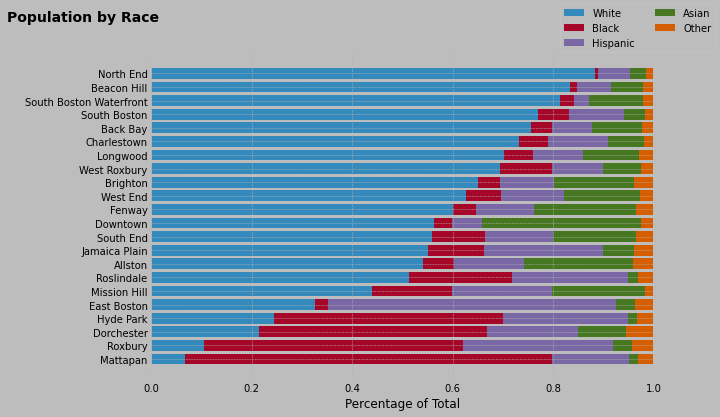

In [17]:
stacked_barh('Race')

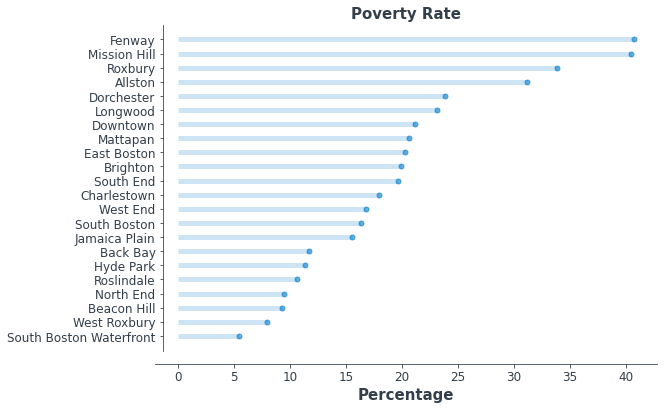

In [18]:
barh('Poverty Rate')

In [19]:
choropleth('Per Capita Income')